# Kickstarter Game Projects

I LOVE board games and once in a while, I would go on Kickstarter and check out the new board game projects that they have. It made me curious, and wanted to do an Analysis on Game Projects on Kickstarter.

There are a lot of Kickstarter Datasets online, including this [website](https://webrobots.io/kickstarter-datasets/). However, for the purpose of learning, I decided to stick with ***BeautifulSoup***, a Python package for parsing HTML and XML documents. The issue I ran into was I couldn't scrape all the game projects on Kickstarter even though I tried so hard to find a way to work around with it. Using BeautifulSoup can be limited, since it only scrape the surface of website. Although it's shown that there are 54k projects in total, the website only displays a very small part of it. I'd love to hear your suggestions!

Since I was only able to scrape 2,400/53,891 Projects (I know, I'm pissed, too!), I will not dive deep into the analysis part. 

## I. Scraping the website

In [5]:
import requests
import random
import time
import requests
from bs4 import BeautifulSoup
import json
import csv

First, let's analyze the response request!

In [10]:
kickstarter_url = 'https://www.kickstarter.com/discover/advanced?category_id=12&woe_id=0&sort=magic&seed=2664694&page=6'
response = requests.get(kickstarter_url)
html = response.text
print(html)

<!DOCTYPE html>
<html class="discover_advanced fontface no-js" data-request-id="db1847d8-2b84-40b6-a6e6-0aad6bfdac17" lang="en">
<head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# kickstarter: http://ogp.me/ns/fb/kickstarter#"><script>
  docElement = this.document.documentElement;
  docElement.className=docElement.className.replace(/\bno-js\b/,'') + 'js';
</script>
<title>
Discover &raquo; Games &mdash; Kickstarter
</title><script>
  window.honeybadgerConfiguration = {
    apiKey : "3ed52f9b",
    environment : "production",
    component : "discover",
    action : "advanced",
    revision : "c7710499e599fcb5cf953eefd601ebd0a8adbb33",
    onerror : false,
    ignorePatterns: [/NS_ERROR_FAILURE/, /NS_ERROR_FILE_CORRUPTED/, /NS_ERROR_NOT_INITIALIZED/, /NS_ERROR_STORAGE_BUSY/, /^Script error.?$/, /^Unspecified error.?$/, /Failed to fetch/, /javaEnabled()/, /Blocked a frame with origin "https:\/\/www\.kickstarter\.com"/, /Permission denied to access property "dispatchEvent"/, /Ca

If we look closely, the project is shown with class name as ***js-react-proj-card***, and the project data is in json with data attribute data-project and the project id in data attribute data-pid. I use random User-Agent list in order to prevent HTTP: 404 Error, and also set time sleep to prevent HTTTP 429: Too Many Request Error. 

I will parse the json and create a csv data set of the following using json library and write to csv file using csv writer.

In [13]:
user_agent_list = [
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.1.1 Safari/605.1.15',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:77.0) Gecko/20100101 Firefox/77.0',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:77.0) Gecko/20100101 Firefox/77.0',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36',
    'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.0.1 Safari/605.1.15'
]


kickstarter_url = \
'https://www.kickstarter.com/discover/advanced?category_id=12&woe_id=0&sort=magic&seed=2664694&page={}'
file = "kickstarter_off.csv"

csvfile = open(file, 'w')
csvwriter = csv.writer(csvfile, delimiter=',')

page_start = 1
for i in range(1,6): #loop to use random user_agent
    while True:
        url = kickstarter_url.format(page_start)
        user_agent = random.choice(user_agent_list)
        #Set the headers 
        headers = {'User-Agent': user_agent}
        #Make the request
        response = requests.get(url,headers=headers)
        print("CURRENT PAGE: {}".format(url))
        
        html = response.text
        soup = BeautifulSoup(html, 'html.parser')
        project_divs = soup.findAll('div', {"class":"js-react-proj-card"})
    
        if len(project_divs) == 0:
            break;
        for div in project_divs:
            project = json.loads(div['data-project'])
            if "location" in project: #there are a few projects with missing locations
                row = [project["id"],project["name"],project["blurb"],
                   project["goal"],project["slug"],project["country"],
                   project['pledged'], project['backers_count'],
                   project["currency"],project["deadline"],project["created_at"],
                   project["launched_at"],project["staff_pick"],
                   project["category"]["id"],project["category"]["name"],
                   project["location"]["id"],project["location"]["name"],
                   project["location"]["country"],project["location"]["state"],
                   project['fx_rate'],
                   project["percent_funded"]]
            else:
                row = [project["id"],project["name"],project["blurb"],
                   project["goal"],project["slug"],project["country"],
                   project['pledged'], project['backers_count'],
                   project["currency"],project["deadline"],project["created_at"],
                   project["launched_at"],project["staff_pick"],
                   project["category"]["id"],project["category"]["name"],
                   project['fx_rate'],
                   project["percent_funded"]]
            csvwriter.writerow(row)
        time.sleep(12) # to prevent from HTTP Error 429: Too Many Requests
        page_start +=1

csvfile.close()


CURRENT PAGE: https://www.kickstarter.com/discover/advanced?category_id=12&woe_id=0&sort=magic&seed=2664694&page=1
CURRENT PAGE: https://www.kickstarter.com/discover/advanced?category_id=12&woe_id=0&sort=magic&seed=2664694&page=2
CURRENT PAGE: https://www.kickstarter.com/discover/advanced?category_id=12&woe_id=0&sort=magic&seed=2664694&page=3
CURRENT PAGE: https://www.kickstarter.com/discover/advanced?category_id=12&woe_id=0&sort=magic&seed=2664694&page=4
CURRENT PAGE: https://www.kickstarter.com/discover/advanced?category_id=12&woe_id=0&sort=magic&seed=2664694&page=5
CURRENT PAGE: https://www.kickstarter.com/discover/advanced?category_id=12&woe_id=0&sort=magic&seed=2664694&page=6
CURRENT PAGE: https://www.kickstarter.com/discover/advanced?category_id=12&woe_id=0&sort=magic&seed=2664694&page=7
CURRENT PAGE: https://www.kickstarter.com/discover/advanced?category_id=12&woe_id=0&sort=magic&seed=2664694&page=8
CURRENT PAGE: https://www.kickstarter.com/discover/advanced?category_id=12&woe_i

## II. Analysis

In [5]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
%matplotlib inline

In [6]:
kc = pd.read_csv('/Users/chauchu/Downloads/kickstarter.csv')
kc.head()

,ID,Name,Blurb,Goal,Slug,Country,Pledged,Backers_count,Currency,Deadline,...,Launched_at,Staff_pick,Category_id,Category_name,Location_id,Location_name,Location_country,Location_state,fx_rate,Percent_funded
0,1974295126,Hellboy: The Roleplaying Game,"A brand-new Hellboy roleplaying experience, ba...",30000,hellboy-the-next-chapter,GB,256805.45,4247,GBP,1599505200,...,1597834801,True,34,Tabletop Games,30720,Nottingham,GB,England,1.335591,856.018167
1,100245492,The Umbrella Academy Game,Umbrella Academy Card Game Based on the Acclai...,30000,the-umbrella-academy-game,US,297797.00,4003,USD,1599278400,...,1595952042,True,34,Tabletop Games,2442047,Los Angeles,US,CA,1.000000,992.656667
2,1558255285,Uprising | Curse of the Last Emperor,A fully cooperative 4X fantasy board game for ...,40000,uprising-curse-of-the-last-emperor,US,241727.00,2460,USD,1599771600,...,1597762643,True,34,Tabletop Games,638242,Berlin,DE,Berlin,1.000000,604.317500
3,775354956,The Girl from Arkanya | A pixel art treasure h...,"A top-down, 2D action RPG following the journe...",10000,the-girl-from-arkanya,US,35453.00,1094,USD,1599155969,...,1596563969,True,35,Video Games,2470851,Peru,US,IN,1.000000,354.530000
4,1711843516,Dungeons & Lasers Second Edition,"Plastic tabletop terrain with a grid. And 6"" t...",20000,dungeons-and-lasers-second-edition,US,490998.00,3616,USD,1599598800,...,1598364018,True,34,Tabletop Games,512430,Piła,PL,Swietokrzyskie,1.000000,2454.990000


First, I'm going to change the format of 'Deadline', 'Created_at', 'Launched_at' columns since they are in unix format.

In [7]:
col_convert = ['Deadline', 'Created_at', 'Launched_at']
for i in col_convert:
    kc[i] = pd.to_datetime(kc[i], origin = 'unix', unit = 's')   
kc['campaign_length'] = (kc['Deadline'] - kc['Launched_at']).dt.days
kc['Deadline'] = kc['Deadline'].apply(lambda x: x.strftime('%Y-%m-%d'))
kc['Created_at'] = kc['Created_at'].apply(lambda x: x.strftime('%Y-%m-%d'))
kc['Launched_at'] = kc['Launched_at'].apply(lambda x: x.strftime('%Y-%m-%d'))

Next, I'm going to add another column called 'success'. A project is succesful if Percent Funded >= 100%.

In [8]:
kc['success'] = kc['Percent_funded'].apply(lambda x: 'Successed' if x >=100 else 'Failed')

I'm going to drop unnecessary columns

In [9]:
kc.drop(columns=['ID', 'Slug','Category_id','Location_id'], inplace = True)

In [11]:
print('The projects from this dataset ended between ' + str(min(kc['Deadline'])) + ' and ' + str(max(kc['Deadline'])))
print('The projects from this dataset has total ' + str(len(kc[kc.duplicated(subset='Name')])) + ' duplicate')

The projects from this dataset ended between 2009-06-15 and 2020-10-29
The projects from this dataset has total 0 duplicate


For this Analysis, I'm going to look at projects from 06-2019 to 01-2020 only.

In [12]:
kc = kc[kc['Deadline'] <= '2020-01-15']

First, let's take a look at what kinds of Game Project there are on Kickstarter.

In [13]:
#Calculate percentage of categories
cat = (kc['Category_name'].value_counts()/kc['Category_name'].count())*100 
cat = cat.round(2).to_frame().reset_index()

#Plot categories
cat.rename(columns={'index': 'Type of Game', 'Category_name': 'Percentage'}, inplace = True)
fig = px.bar(cat, x= 'Percentage', y= 'Type of Game', 
             width=700, title = 'Types of Game Project on Kickstarter 06/2019 - 01/2020', 
             text = 'Percentage', color = 'Type of Game')
fig.update_layout(yaxis_categoryorder = 'total ascending', 
                  showlegend = False,
                 yaxis_title = ' ')
iplot(fig)

As I expected, Kickstarter is a famous funding website for Board Games! Almost 50% of the projects are Board Games. 

Next, let's see where these projects are from. Since the Country column is formatted in ISO 3166-1 alpha-2, and Plotly only supports ISO 3166-1 alpha-3 for its choropleth map, I'm going to transform Country column to the appropriate format!

In [14]:
#dictionary of iso alpha2-3
ISO_3166_2_to_3 = {'AF':'AFG','AX':'ALA',
'AL':'ALB','DZ':'DZA','AS':'ASM','AD':'AND','AO':'AGO','AI':'AIA','AQ':'ATA',
'AG':'ATG','AR':'ARG','AM':'ARM','AW':'ABW','AU':'AUS','AT':'AUT','AZ':'AZE','BS':'BHS','BH':'BHR','BD':'BGD',
'BB':'BRB','BY':'BLR','BE':'BEL','BZ':'BLZ','BJ':'BEN','BM':'BMU','BT':'BTN','BO':'BOL','BA':'BIH','BW':'BWA',
'BV':'BVT','BR':'BRA','IO':'IOT','BN':'BRN','BG':'BGR','BF':'BFA','BI':'BDI','KH':'KHM','CM':'CMR','CA':'CAN',
'CV':'CPV','KY':'CYM','CF':'CAF','TD':'TCD','CL':'CHL','CN':'CHN','CX':'CXR','CC':'CCK','CO':'COL','KM':'COM',
'CG':'COG','CD':'COD','CK':'COK','CR':'CRI','CI':'CIV','HR':'HRV','CU':'CUB','CY':'CYP','CZ':'CZE','DK':'DNK',
'DJ':'DJI','DM':'DMA','DO':'DOM','EC':'ECU','EG':'EGY','SV':'SLV','GQ':'GNQ','ER':'ERI','EE':'EST','ET':'ETH',
'FK':'FLK','FO':'FRO','FJ':'FJI','FI':'FIN','FR':'FRA','GF':'GUF','PF':'PYF','TF':'ATF','GA':'GAB','GM':'GMB',
'GE':'GEO','DE':'DEU','GH':'GHA','GI':'GIB','GR':'GRC','GL':'GRL','GD':'GRD',
'GP':'GLP','GU':'GUM','GT':'GTM','GG':'GGY','GN':'GIN','GW':'GNB','GY':'GUY','HT':'HTI','HM':'HMD','VA':'VAT',
'HN':'HND','HK':'HKG','HU':'HUN','IS':'ISL','IN':'IND','ID':'IDN','IR':'IRN','IQ':'IRQ','IE':'IRL','IM':'IMN',
'IL':'ISR','IT':'ITA','JM':'JAM','JP':'JPN','JE':'JEY','JO':'JOR','KZ':'KAZ','KE':'KEN','KI':'KIR','KP':'PRK',
'KR':'KOR','KW':'KWT','KG':'KGZ','LA':'LAO','LV':'LVA','LB':'LBN','LS':'LSO','LR':'LBR','LY':'LBY','LI':'LIE',
'LT':'LTU','LU':'LUX','MO':'MAC','MK':'MKD','MG':'MDG','MW':'MWI','MY':'MYS','MV':'MDV','ML':'MLI','MT':'MLT',
'MH':'MHL','MQ':'MTQ','MR':'MRT','MU':'MUS','YT':'MYT','MX':'MEX','FM':'FSM','MD':'MDA','MC':'MCO','MN':'MNG',
'ME':'MNE','MS':'MSR','MA':'MAR','MZ':'MOZ','MM':'MMR','NA':'NAM','NR':'NRU','NP':'NPL','NL':'NLD','AN':'ANT',
'NC':'NCL','NZ':'NZL','NI':'NIC','NE':'NER','NG':'NGA','NU':'NIU','NF':'NFK','MP':'MNP','NO':'NOR','OM':'OMN',
'PK':'PAK','PW':'PLW','PS':'PSE','PA':'PAN','PG':'PNG','PY':'PRY','PE':'PER','PH':'PHL','PN':'PCN','PL':'POL',
'PT':'PRT','PR':'PRI','QA':'QAT','RE':'REU','RO':'ROU','RU':'RUS','RW':'RWA','BL':'BLM','SH':'SHN','KN':'KNA',
'LC':'LCA','MF':'MAF','PM':'SPM','VC':'VCT','WS':'WSM','SM':'SMR','ST':'STP','SA':'SAU','SN':'SEN','RS':'SRB',
'SC':'SYC','SL':'SLE','SG':'SGP','SK':'SVK','SI':'SVN','SB':'SLB','SO':'SOM','ZA':'ZAF','GS':'SGS','ES':'ESP',
'LK':'LKA','SD':'SDN','SR':'SUR','SJ':'SJM','SZ':'SWZ','SE':'SWE','CH':'CHE','SY':'SYR','TW':'TWN','TJ':'TJK',
'TZ':'TZA','TH':'THA','TL':'TLS','TG':'TGO','TK':'TKL','TO':'TON','TT':'TTO','TN':'TUN','TR':'TUR','TM':'TKM',
'TC':'TCA','TV':'TUV','UG':'UGA','UA':'UKR','AE':'ARE','GB':'GBR','US':'USA','UM':'UMI','UY':'URY','UZ':'UZB',
'VU':'VUT','VE':'VEN','VN':'VNM','VG':'VGB','VI':'VIR','WF':'WLF','EH':'ESH','YE':'YEM','ZM':'ZMB','ZW':'ZWE'
}

#Transform the column
kc.replace({'Country':ISO_3166_2_to_3}, inplace=True)

/Users/chauchu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6666: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
#Plot the data
country = kc['Country'].value_counts().to_frame().reset_index()

fig = px.choropleth(country, locations='index',
                    color='Country', title = 'Where are the Game Projects from?',
                    color_continuous_scale=px.colors.sequential.Plasma)
iplot(fig)

Most of the projects came from North American countries, and European countries. The U.S. leads with the most projects. Next to it is Canada. There are also some projects come from Japan, New Zealand and Australia!

How many of those projects are successful?

In [16]:
suc = kc['success'].value_counts().to_frame().reset_index()
suc.rename(columns={'index': 'Successed', 'success': 'Total'}, inplace = True)

fig = px.pie(suc, values='Total', names='Successed', hole = .3)
fig.update_layout(title_text="How Many of the Projects Became Successful?", title_x = 0.3, )
iplot(fig)

Surprisingly, almost all these projects are succesful. However, we need to remind ouselves that the dataset I have here only include 5% of the total Game Projects on Kickstarter. Therefore, the data can be extremely bias.

/Users/chauchu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, '$Pledged per Backer')

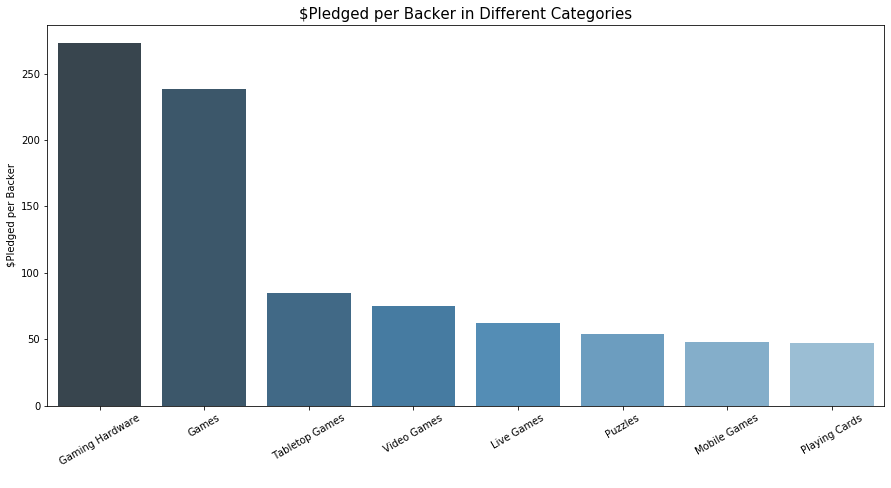

In [17]:
#Calculate Average $Pledge per backer in each Category
kc['pld_per_backer'] = kc['Pledged']/kc['Backers_count']
avg_ppb = kc.groupby('Category_name')['pld_per_backer'].mean().to_frame().reset_index()
avg_ppb.sort_values(by = 'pld_per_backer',ascending = False, inplace = True)

#Plot data
plt.figure(figsize = (15,7))
sns.barplot(x='Category_name', y = 'pld_per_backer', data = avg_ppb, palette="Blues_d")
plt.title('$Pledged per Backer in Different Categories', fontsize = 15)
plt.xlabel(' ')
plt.xticks(rotation = 30)
plt.ylabel('$Pledged per Backer')

Although number of gaming hardware projects are less than 1% in this dataset, it leads with the most average money backed by backers. This is very understandable, since gaming hardwares are expensive to make. 

## III. Future Directions

Next, after my research, I think I will try Nokogiri to scrape Kickstarter again. Nokogiri is an open source library which helps parse HTML and XML in Ruby. I will use the dataset I collect to do a machine learning project to predict the success of a project. 
